# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
# Importing necessary items
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [2]:
# Importing the data
!pip install palmerpenguins
import palmerpenguins
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [3]:
# Dropping the rows in the dataframe that have missing values
penguins = penguins.dropna()

#saving species seperately so it doesn't get dummified
species = penguins['species']

# Using get_dummies to convert categorical data into dummy variables
penguins = pd.get_dummies(penguins.drop(columns = ['species']))

# Using the "* 1" to change the true/falses of dummy variables into numbers
penguins = penguins * 1

#adding species back into the dataset
penguins['species'] = species

# Seeing what dataset looks like now
penguins.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male,species
0,39.1,18.7,181.0,3750.0,2007,0,0,1,0,1,Adelie
1,39.5,17.4,186.0,3800.0,2007,0,0,1,1,0,Adelie
2,40.3,18.0,195.0,3250.0,2007,0,0,1,1,0,Adelie
4,36.7,19.3,193.0,3450.0,2007,0,0,1,1,0,Adelie
5,39.3,20.6,190.0,3650.0,2007,0,0,1,0,1,Adelie


Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

# KNN MODEL

(First, using gridsearch to pick values of k)

In [4]:
# Identifying X and y
X = penguins.drop(['species'], axis = 1)
y = penguins['species']

In [5]:
# splitting the data to test it
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 321, stratify=y)

# encoding y_train and y_test for classification models
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [6]:
# creating a KNN pipeline
KNNpipeline = Pipeline(
  [("standardize", StandardScaler()),
  ("KNN_Classifier", KNeighborsClassifier())]
).set_output(transform="pandas")

n_neighbors = {'KNN_Classifier__n_neighbors': np.arange(1, 11, 1)}

gscv = GridSearchCV(KNNpipeline, param_grid=n_neighbors, cv = 5, scoring='accuracy')

In [7]:
# fitting on to the data
gscv_fitted = gscv.fit(X, y)

gscv_fitted.cv_results_

# Neatly showing the results
df_cv_results_ = pd.DataFrame(gscv_fitted.cv_results_)

df_cv_results_


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_KNN_Classifier__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010246,0.000992,0.011315,0.002583,1,{'KNN_Classifier__n_neighbors': 1},0.985075,0.940299,0.985075,0.984848,0.863636,0.951787,0.047353,10
1,0.010226,0.000779,0.008611,0.000725,2,{'KNN_Classifier__n_neighbors': 2},0.985075,0.955224,0.985075,0.984848,0.984848,0.979014,0.011896,9
2,0.009285,0.000196,0.008961,0.000973,3,{'KNN_Classifier__n_neighbors': 3},1.000000,0.955224,1.000000,0.984848,0.984848,0.984984,0.016350,7
3,0.009128,0.000290,0.008497,0.000164,4,{'KNN_Classifier__n_neighbors': 4},1.000000,0.970149,1.000000,0.984848,0.984848,0.987969,0.011194,3
4,0.008988,0.000659,0.008447,0.000200,5,{'KNN_Classifier__n_neighbors': 5},1.000000,0.985075,1.000000,1.000000,0.984848,0.993985,0.007368,1
5,0.009828,0.000894,0.007984,0.001145,6,{'KNN_Classifier__n_neighbors': 6},1.000000,0.985075,0.985075,0.984848,0.984848,0.987969,0.006016,3
6,0.005586,0.000120,0.005425,0.000116,7,{'KNN_Classifier__n_neighbors': 7},1.000000,0.970149,0.985075,0.984848,0.984848,0.984984,0.009440,7
7,0.007801,0.001674,0.007293,0.001582,8,{'KNN_Classifier__n_neighbors': 8},1.000000,0.985075,0.985075,0.984848,0.984848,0.987969,0.006016,3
8,0.009135,0.000227,0.008705,0.000577,9,{'KNN_Classifier__n_neighbors': 9},1.000000,0.985075,0.985075,0.984848,0.984848,0.987969,0.006016,3
9,0.009245,0.000539,0.008517,0.000165,10,{'KNN_Classifier__n_neighbors': 10},1.000000,0.985075,0.985075,0.984848,1.000000,0.991000,0.007349,2


# **My first real KNN model**

In [8]:
# creating a KNN pipeline with 5 nearest neighbors
KNNpipeline1 = Pipeline(
  [("standardize", StandardScaler()),
  ("KNN_Classifier", KNeighborsClassifier(n_neighbors = 5))]
).set_output(transform="pandas")

KNNpipeline1

Pipeline(steps=[('standardize', StandardScaler()),
                ('KNN_Classifier', KNeighborsClassifier())])

In [9]:
#Fitting the data to this best pipeline
KNNpipeline1.fit(X_train, y_train)


Pipeline(steps=[('standardize', StandardScaler()),
                ('KNN_Classifier', KNeighborsClassifier())])

In [10]:
KNNpipeline1.predict(X_train)

array(['Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo',
       'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Chinstrap', 'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Chinstrap', 'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Chinstrap', 'Chinstrap', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Gen

In [11]:
KNN1proba = KNNpipeline1.predict_proba(X_train)
KNN1proba

array([[1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0.2, 0.8, 0. ],
       [0.4, 0.6, 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0.4, 0.6, 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. 

In [12]:
pd.crosstab(y_train, pd.Series(KNNpipeline1.predict(X_train), name = "Predicted"))

Predicted,Adelie,Chinstrap,Gentoo
species,,,
Adelie,49,20,40
Gentoo,31,16,24


In [13]:
y_train_ = pd.Series(KNNpipeline1.predict(X_train), name = "Predicted")

pd.crosstab(y_train, y_train_, margins=True)

Predicted,Adelie,Chinstrap,Gentoo,All
species,,,,
Adelie,49,20,40,109
Gentoo,31,16,24,71
All,80,36,64,180


In [14]:
confusion_matrix(y_train, y_train_)

array([[108,   1,   0],
       [  0,  51,   0],
       [  0,   0,  89]])

In [15]:
accuracy_score(y_train, y_train_)

0.9959839357429718

In [16]:
precision_score(y_train, y_train_, average=None, labels=KNNpipeline1.classes_)

array([1.        , 0.98076923, 1.        ])

In [17]:
recall_score(y_train, y_train_, average=None, labels=KNNpipeline1.classes_)

array([0.99082569, 1.        , 1.        ])

In [18]:
#finding auc
#getting predicted probabilities for each class on the test data
KNN1proba_test = KNNpipeline1.predict_proba(X_test)

#finding ROC AUC score for each class
KNN1auc = roc_auc_score(y_test, KNN1proba_test, average=None, multi_class='ovr', labels=KNNpipeline1.classes_)
KNN1auc

array([1., 1., 1.])

In [19]:
KNN1f1species = f1_score(y_train, y_train_, average=None, labels=KNNpipeline1.classes_)

pd.DataFrame({"Species": KNNpipeline1.classes_, "F1-Score": KNN1f1species})

,Species,F1-Score
0,Adelie,0.995392
1,Chinstrap,0.990291
2,Gentoo,1.000000


Computing the following for the first knn model:

Confusion matrix,
Overall Accuracy,
Precision, Recall, AUC, and F1-score for each species

# **My second KNN model**

In [20]:
# creating a KNN pipeline with 5 nearest neighbors
KNNpipeline2 = Pipeline(
  [("standardize", StandardScaler()),
  ("KNN_Classifier", KNeighborsClassifier(n_neighbors = 10))]
).set_output(transform="pandas")

KNNpipeline2

Pipeline(steps=[('standardize', StandardScaler()),
                ('KNN_Classifier', KNeighborsClassifier(n_neighbors=10))])

In [21]:
#Fitting the data to this best pipeline
KNNpipeline2.fit(X_train, y_train)

Pipeline(steps=[('standardize', StandardScaler()),
                ('KNN_Classifier', KNeighborsClassifier(n_neighbors=10))])

In [22]:
KNNpipeline2.predict(X_train)

array(['Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo',
       'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Chinstrap', 'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Chinstrap', 'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 

In [23]:
KNN2proba = KNNpipeline2.predict_proba(X_train)
KNN2proba

array([[1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0.8, 0.2, 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0.9, 0.1, 0. ],
       [1. , 0. , 0. ],
       [0.5, 0.5, 0. ],
       [0.3, 0.7, 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0.9, 0.1, 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0.3, 0.7, 0. ],
       [0. , 0. , 1. ],
       [0.1, 0.9, 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0.3, 0.7, 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0.9, 0.1, 0. ],
       [1. , 0. , 0. ],
       [1. , 0. 

In [24]:
pd.crosstab(y_train, pd.Series(KNNpipeline2.predict(X_train), name = "Predicted"))

Predicted,Adelie,Chinstrap,Gentoo
species,,,
Adelie,50,19,40
Gentoo,31,16,24


In [25]:
y_train_ = pd.Series(KNNpipeline2.predict(X_train), name = "Predicted")

pd.crosstab(y_train, y_train_, margins=True)

Predicted,Adelie,Chinstrap,Gentoo,All
species,,,,
Adelie,50,19,40,109
Gentoo,31,16,24,71
All,81,35,64,180


In [26]:
confusion_matrix(y_train, y_train_)

array([[108,   1,   0],
       [  2,  49,   0],
       [  0,   0,  89]])

In [27]:
accuracy_score(y_train, y_train_)

0.9879518072289156

In [28]:
precision_score(y_train, y_train_, average=None, labels=KNNpipeline2.classes_)

array([0.98181818, 0.98      , 1.        ])

In [29]:
recall_score(y_train, y_train_, average=None, labels=KNNpipeline2.classes_)

array([0.99082569, 0.96078431, 1.        ])

In [30]:
#finding auc
#getting predicted probabilities for each class on the test data
KNN2proba_test = KNNpipeline2.predict_proba(X_test)

#finding ROC AUC score for each class
KNN2auc = roc_auc_score(y_test, KNN2proba_test, average=None, multi_class='ovr', labels=KNNpipeline2.classes_)
KNN2auc

array([1., 1., 1.])

In [31]:
KNN2f1species = f1_score(y_train, y_train_, average=None, labels=KNNpipeline2.classes_)

pd.DataFrame({"Species": KNNpipeline2.classes_, "F1-Score": KNN2f1species})

,Species,F1-Score
0,Adelie,0.986301
1,Chinstrap,0.970297
2,Gentoo,1.000000


# Decision Tree Models

## **FIRST DECISION TREE**

In [32]:
dt1pipeline = Pipeline(
  [("standardize", StandardScaler()),
  ("decision_tree", DecisionTreeClassifier(max_depth=2))]
)

In [33]:
#Fitting the data to this pipeline
dt1pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardize', StandardScaler()),
                ('decision_tree', DecisionTreeClassifier(max_depth=2))])

In [34]:
dt1pipeline.predict(X_train)

array(['Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo',
       'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Chinstrap', 'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie',
       'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Gento

In [35]:
dt1proba = dt1pipeline.predict_proba(X_train)
dt1proba

array([[0.95412844, 0.04587156, 0.        ],
       [0.        , 0.        , 1.        ],
       [0.95412844, 0.04587156, 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.95412844, 0.04587156, 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.95412844, 0.04587156, 0.        ],
       [0.06122449, 0.91836735, 0.02040816],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.06122449, 0.91836735, 0.02040816],
       [0.95412844, 0.04587156, 0.        ],
       [0.06122449, 0.91836735, 0.02040816],
       [0.        , 0.        , 1.        ],
       [0.95412844, 0.04587156, 0.        ],
       [0.95412844, 0.04587156, 0.        ],
       [0.95412844, 0.04587156, 0.        ],
       [0.95412844, 0.04587156, 0.        ],
       [0.        , 0.        , 1.        ],
       [0.

In [36]:
pd.crosstab(y_train, pd.Series(dt1pipeline.predict(X_train), name = "Predicted"))

Predicted,Adelie,Chinstrap,Gentoo
species,,,
Adelie,51,18,40
Gentoo,29,18,24


In [37]:
y_train_ = pd.Series(dt1pipeline.predict(X_train), name = "Predicted")

pd.crosstab(y_train, y_train_, margins=True)

Predicted,Adelie,Chinstrap,Gentoo,All
species,,,,
Adelie,51,18,40,109
Gentoo,29,18,24,71
All,80,36,64,180


In [38]:
confusion_matrix(y_train, y_train_)

array([[106,   3,   0],
       [  6,  45,   0],
       [  0,   1,  88]])

In [39]:
accuracy_score(y_train, y_train_)

0.9598393574297188

In [40]:
precision_score(y_train, y_train_, average=None, labels=dt1pipeline.classes_)

array([0.94642857, 0.91836735, 1.        ])

In [41]:
recall_score(y_train, y_train_, average=None, labels=dt1pipeline.classes_)

array([0.97247706, 0.88235294, 0.98876404])

In [42]:
#finding auc
#getting predicted probabilities for each class on the test data
dt1proba_test = dt1pipeline.predict_proba(X_test)

#finding ROC AUC score for each class
dt1auc = roc_auc_score(y_test, dt1proba_test, average=None, multi_class='ovr', labels=dt1pipeline.classes_)
dt1auc

array([0.99396205, 0.98244074, 0.99537037])

In [43]:
dt1f1species = f1_score(y_train, y_train_, average=None, labels=dt1pipeline.classes_)

pd.DataFrame({"Species": dt1pipeline.classes_, "F1-Score": dt1f1species})

,Species,F1-Score
0,Adelie,0.959276
1,Chinstrap,0.900000
2,Gentoo,0.994350


## **SECOND DECISION TREE**

In [44]:
dt2pipeline = Pipeline(
  [("standardize", StandardScaler()),
  ("decision_tree", DecisionTreeClassifier(max_depth=3))]
)

In [45]:
#Fitting the data to this pipeline
dt2pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardize', StandardScaler()),
                ('decision_tree', DecisionTreeClassifier(max_depth=3))])

In [46]:
dt2pipeline.predict(X_train)

array(['Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo',
       'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Chinstrap', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Chinstrap', 'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Gentoo',

In [47]:
dt2proba = dt2pipeline.predict_proba(X_train)
dt2proba

array([[0.99      , 0.01      , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.55555556, 0.44444444, 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.99      , 0.01      , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.99      , 0.01      , 0.        ],
       [0.02173913, 0.97826087, 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.02173913, 0.97826087, 0.        ],
       [0.55555556, 0.44444444, 0.        ],
       [0.02173913, 0.97826087, 0.        ],
       [0.        , 0.        , 1.        ],
       [0.99      , 0.01      , 0.        ],
       [0.99      , 0.01      , 0.        ],
       [0.55555556, 0.44444444, 0.        ],
       [0.55555556, 0.44444444, 0.        ],
       [0.        , 0.        , 1.        ],
       [0.

In [48]:
pd.crosstab(y_train, pd.Series(dt2pipeline.predict(X_train), name = "Predicted"))

Predicted,Adelie,Chinstrap,Gentoo
species,,,
Adelie,52,17,40
Gentoo,30,17,24


In [49]:
y_train_ = pd.Series(dt2pipeline.predict(X_train), name = "Predicted")

pd.crosstab(y_train, y_train_, margins=True)

Predicted,Adelie,Chinstrap,Gentoo,All
species,,,,
Adelie,52,17,40,109
Gentoo,30,17,24,71
All,82,34,64,180


In [50]:
confusion_matrix(y_train, y_train_)

array([[108,   1,   0],
       [  5,  46,   0],
       [  1,   0,  88]])

In [51]:
accuracy_score(y_train, y_train_)

0.9718875502008032

In [52]:
precision_score(y_train, y_train_, average=None, labels=dt1pipeline.classes_)

array([0.94736842, 0.9787234 , 1.        ])

In [53]:
recall_score(y_train, y_train_, average=None, labels=dt1pipeline.classes_)

array([0.99082569, 0.90196078, 0.98876404])

In [54]:
#finding auc
#getting predicted probabilities for each class on the test data
dt2proba_test = dt2pipeline.predict_proba(X_test)

#finding ROC AUC score for each class
dt2auc = roc_auc_score(y_test, dt2proba_test, average=None, multi_class='ovr', labels=dt2pipeline.classes_)
dt2auc

array([0.99798735, 1.        , 0.99969136])

In [55]:
dt2f1species = f1_score(y_train, y_train_, average=None, labels=dt2pipeline.classes_)

pd.DataFrame({"Species": dt2pipeline.classes_, "F1-Score": dt2f1species})

,Species,F1-Score
0,Adelie,0.968610
1,Chinstrap,0.938776
2,Gentoo,0.994350


# ROC CURVE

In [56]:
#making a roc curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

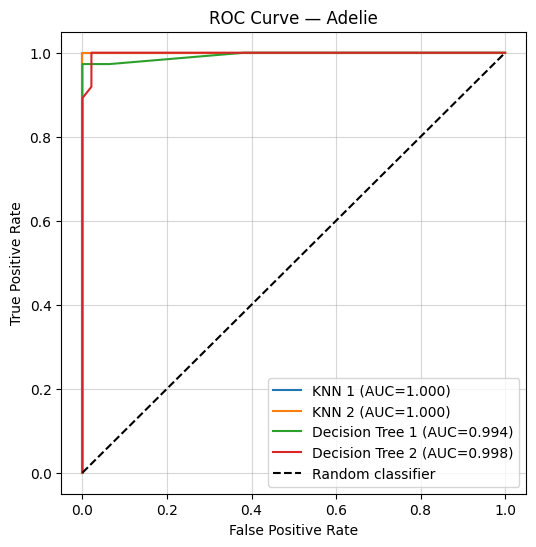

In [57]:
#note: i needed ai to help me with making this plot
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

models = {
    "KNN 1": KNNpipeline1,
    "KNN 2": KNNpipeline2,
    "Decision Tree 1": dt1pipeline,
    "Decision Tree 2": dt2pipeline
}

#making binary labels: 1 for Adelie, 0 otherwise
y_bin = (y_test == "Adelie").astype(int)

plt.figure(figsize=(6, 6))

for name, model in models.items():
    probs = model.predict_proba(X_test)
    adelie_index = list(model.classes_).index("Adelie")
    fpr, tpr, _ = roc_curve(y_bin, probs[:, adelie_index])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc_score:.3f})")

plt.plot([0, 1], [0, 1], "k--", label="Random classifier")
plt.title("ROC Curve — Adelie")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(alpha=0.5)
plt.show()